# HANDWRITTEN DIGITS DATASET

**File:** HandwrittenDigits.ipynb


# IMPORT LIBRARIES

In [1]:
import pandas as pd                                   # For dataframes
import numpy as np                                    # For various functions
import matplotlib.pyplot as plt                       # For plotting functions
import seaborn as sns                                 # For additional plotting functions
from sklearn.model_selection import train_test_split  # For train/test splits
%matplotlib inline

C:\Users\imran\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


# LOAD AND PREPARE DATA
Many of the datasets for this course come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For all three demonstrations of dimensionality reduction, we'll use the "Optical Recognition of Handwritten Digits Data Set," which can be accessed via [https://j.mp/34NFNGn](https://j.mp/34NFNGn). We'll use the dataset saved in "optdigits.tra," which is the training dataset. 

In [ ]:
## Import Data

- To read read the dataset from a local CSV file, run the following cell. (This is the recommended approach.)

In [2]:
df = pd.read_csv('data/optdigits_raw.csv')

- Alternatively, to read the data from the UCI ML Repository, uncomment the lines in the cell below and run them.

In [ ]:
# df = pd.read_csv(
#     'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', 
#     header=None)

- Check the data.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Rename Variables

- Sequentially renames all attribute columns (i.e., pixel data) as `P0`, `P2`, etc.
- Renames the class variable as `y`.

In [4]:
df.columns = ["P" + str(i) for i in range(0, len(df.columns) - 1)] + ["y"]

## Select Cases

- Select cases for the digits {1, 3, 6}.
- Look at the first 5 rows.

In [5]:
df = df.loc[df.y.isin([1, 3, 6])]

df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


## Split Data

- `train_test_split()` splits the data into training and testing sets.
- Specify the data matrix `X`, which contrains the attributes of the pixel data.
- Extract columns `P0`, `P2`, ..., `P63` with `df.filter(regex='\d')`, which will keep only names with a numeric digits in them.
- Specify the target variable as `df.y`.
- Create the `trn` and `tst` dataframes.

In [6]:
# Renames columns
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn["y"] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst["y"] = y_tst

# EXPLORE TRAINING DATA

## Display Images
Display the images of the first 20 digits of `X_train`.

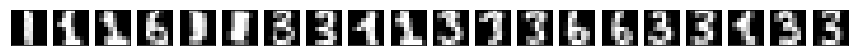

In [9]:
# Sets up a grid for the images
fig, ax = plt.subplots(
    nrows=1, 
    ncols=20, 
    figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Plots 20 digits
for i in np.arange(20):
    ax[i].imshow(X_trn.to_numpy()[i,0:64].reshape(8, 8), cmap=plt.cm.gray)   
plt.show()

# SAVE DATA
Save `df`, `trn`, and `tst` to CSV files to be used later.

In [10]:
df.to_csv('data/optdigits.csv', sep=',', index=False)
trn.to_csv('data/optdigits_trn.csv', sep=',' ,index=False)
tst.to_csv('data/optdigits_tst.csv', sep=',' ,index=False)

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.